In [1]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set chart dimensions
a4Dims = (11.7, 8.27)

In [2]:
url = 'http://bayesian-bandit.adludio.com/'
r = requests.post(url +'dump_bandit_data', 
    json={'item_group_id_list': ['b5yn8r3', 's2dmtni', 'bwik4qv', '73t0r3u', 'wqgxoc1', 
                                 'u2t9dgi', 'uwyvrja', 'pace1ha', 'vf03dnt', '36b7iyw' ] } )
parsed = json.loads(r.content)
df = pd.DataFrame(parsed['bandit_data']).sort_values('date').reset_index(drop=True).drop(columns='id')
df

,item_id,item_group_id,date,created_at,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue
0,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.50
1,yar3gt3,b5yn8r3,2020-07-27,2021-02-01 18:53:14,260,2991,260,2991,4,11.61,78.00
2,1wr71gl,b5yn8r3,2020-07-27,2021-02-01 18:53:14,286,2968,286,2968,9,12.03,85.80
3,1wr71gl,b5yn8r3,2020-07-28,2021-02-01 18:53:14,349,3169,349,3169,11,12.87,104.70
4,p673nlk,b5yn8r3,2020-07-28,2021-02-01 18:53:14,339,3306,339,3306,2,12.88,101.70
...,...,...,...,...,...,...,...,...,...,...,...
1455,pjiwct6,36b7iyw,2020-12-14,2021-02-01 18:55:19,946,6132,946,6132,59,66.59,236.50
1456,0yyr8tx,36b7iyw,2020-12-15,2021-02-01 18:55:19,1399,9620,1399,9620,64,104.60,349.75
1457,pjiwct6,36b7iyw,2020-12-15,2021-02-01 18:55:19,993,6077,993,6077,67,66.08,248.25
1458,0yyr8tx,36b7iyw,2020-12-16,2021-02-01 18:55:20,856,4523,856,4523,30,49.36,214.00


In [3]:
# check for all the unique values in the item_group_id(campaign) col
df.item_group_id.unique()

array(['b5yn8r3', 's2dmtni', 'bwik4qv', '73t0r3u', 'wqgxoc1', 'u2t9dgi',
       'uwyvrja', 'pace1ha', '36b7iyw'], dtype=object)

# Task 1

Selected item_group_ids are ***b5yn8r3***, ***73t0r3u***, ***36b7iyw***

In [4]:
# Creating dataframes containing only the selected campaigns
dfB5 = df.loc[df["item_group_id"] == "b5yn8r3"]
df73 = df.loc[df["item_group_id"] == "73t0r3u"]
df36 = df.loc[df["item_group_id"] == "36b7iyw"]

In [5]:
# Create a plotting function
def plotLine(df, yAxisValue):
    campaignId = df["item_group_id"].unique()[0]
    fig, ax = plt.subplots(figsize=a4Dims)
    sns.lineplot(x="date", y=yAxisValue, hue="item_id", data=df, ci=None, ax=ax)
    plt.xticks(rotation=90)
    plt.title(f"item_group: {campaignId} vs {yAxisValue}")

### item_group: b5yn8r3 engagement and conversion rate plots

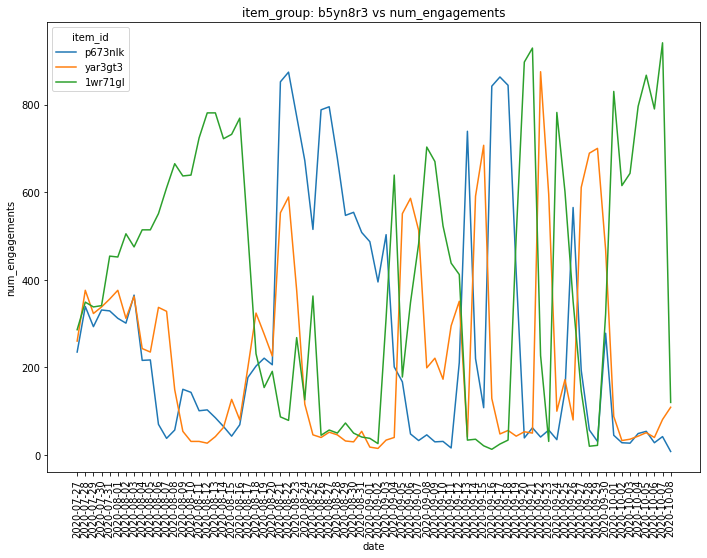

In [6]:
# b5yn8
plotLine(dfB5, "num_engagements")

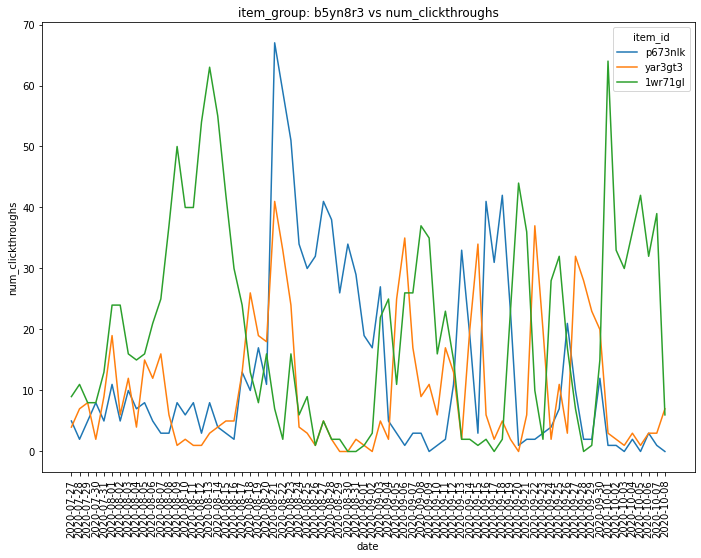

In [7]:
# clickthrough plot
plotLine(dfB5, "num_clickthroughs")

In [41]:
dfB5.item_id.unique()

array(['p673nlk', 'yar3gt3', '1wr71gl'], dtype=object)

> The number of clickthoughs and number of engagements graphs followed a similar trend with the position of item with highest number of clickthroughs and engagements alternating between the three items. When two items where having high values the third item had low numbers of clickthroughs and engagement, when one item had a high value the other two items had low numbers of clickthroughs and engagement.

> From the graphs, item 1wr71gl could be estimated to have the highest number of clickthroughs and number of engagements 

### item_group: 73t0r3u engagement and conversion rate plots

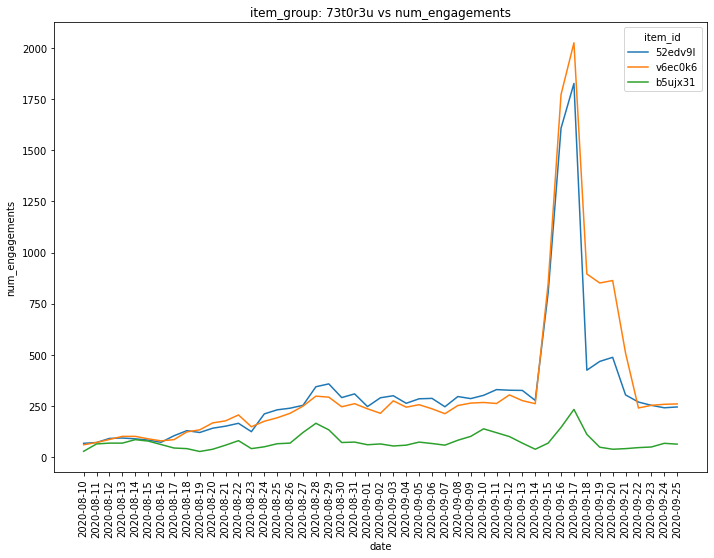

In [8]:
plotLine(df73, "num_engagements")

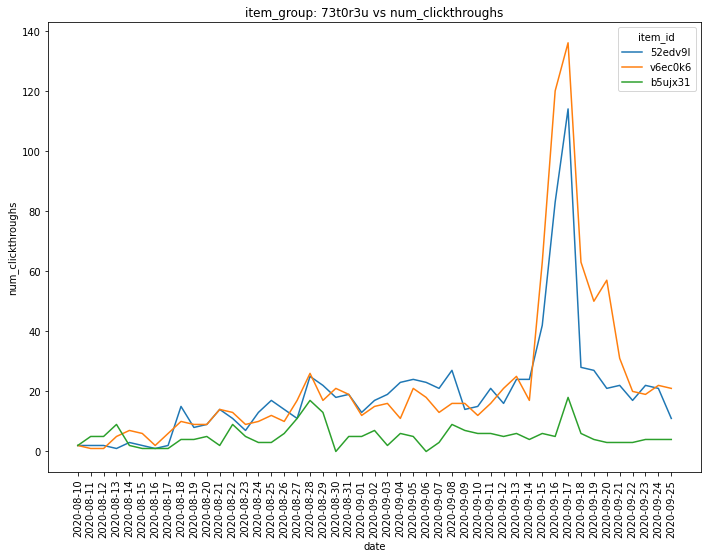

In [9]:
plotLine(df73, "num_clickthroughs")

> The number of clickthoughs and number of engagements graphs followed a similar trend. Item 52edv9l and item v6ec0k6 had a similar number of clickthroughs with a slight advantage to item 52edv9l around the first week of September. However on the number of engagements item 52edv9l had slightly higher values than item v6ec0k6 from the last week of august to mid-week september. item b5ujx31 had the lowest number of engagements and clickthroughs through out the time period

> All three items experienced a spike in both engagement and clickthrough around 17th September. The spike was short lived and they dropped to similar numbers as before soon after 

### item_group: 36b7iyw engagement and conversion rate plots

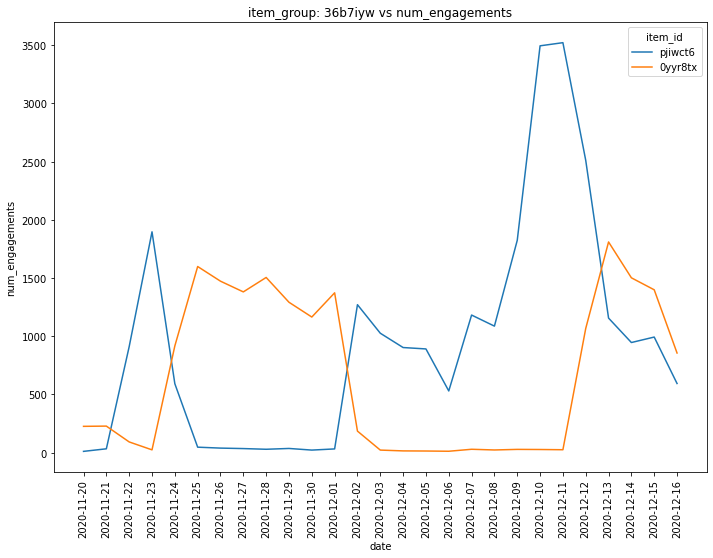

In [10]:
plotLine(df36, "num_engagements")

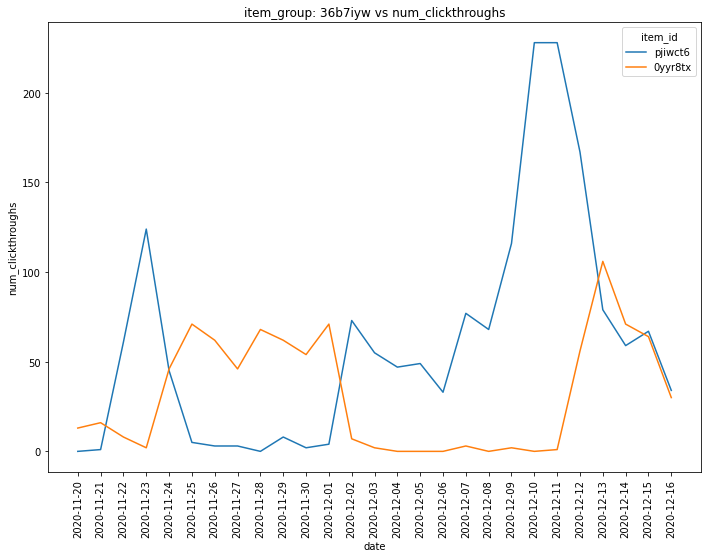

In [11]:
plotLine(df36, "num_clickthroughs")

> The number of clickthoughs and number of engagements graphs followed a similar trend. The highest periods of clickthroughs and engagements seemed to alternated between the two items in the adgroup with item with item_id pjicwt6 having much higher peaks. However the item with item_id Oyyr8tx took a lead on 13th December and proceeded to take a nose dive just as item pjicwt6.

# Task 2

In [12]:
dfTask2 = pd.read_csv("../data/GLOBAL-461053 Adludio History 2021-02-26.csv")
dfTask2

,modifiedon,user,table,column,OldValue,NewValue,primarykey,secondarykey,modifiedby,source
0,2021-02-19 15:32:05.1885877,angela.yu@adludio.com,CampaignFlight,EndDateExclusiveUTC,2021-02-23T04:59:00,2021-02-22T04:59:00,rf33gwg,2023334,ttd_api,.Net SqlClient Data Provider
1,2021-02-18 01:51:18.8845678,angela.yu@adludio.com,CampaignFlight,EndDateExclusiveUTC,2021-03-01T04:59:00,2021-02-23T04:59:00,rf33gwg,2023334,ttd_api,.Net SqlClient Data Provider
2,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,3874.000000,gehehl7,2037170,ttd_api,.Net SqlClient Data Provider
3,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,2086.000000,oropida,2037170,ttd_api,.Net SqlClient Data Provider
4,2021-02-12 17:15:49.9209108,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,6476.920000,7370.920000,gehehl7,(null),ttd_api,.Net SqlClient Data Provider
...,...,...,...,...,...,...,...,...,...,...
3002,2020-08-30 08:18:17.1630000,abigail.gammell@adludio.com,AdGroup,BaseBidCPMInAdvertiserCurrency,4.000000,5.000000,unwvpjo,(null),ttd_api,.Net SqlClient Data Provider
3003,2020-08-30 05:04:27.6870000,abigail.gammell@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,30.000000,40.000000,s1gj6o7,1635300,ttd_api,.Net SqlClient Data Provider
3004,2020-08-30 05:04:27.6830000,abigail.gammell@adludio.com,AdGroup,BudgetInAdvertiserCurrency,30.000000,40.000000,s1gj6o7,(null),ttd_api,.Net SqlClient Data Provider
3005,2020-08-30 05:04:19.8030000,abigail.gammell@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,150.000000,170.000000,unwvpjo,1635300,ttd_api,.Net SqlClient Data Provider


In [13]:
# select rows where the column value is BudgetInAdvertiserCurrency
dfTTD = dfTask2.loc[dfTask2["column"] == "BudgetInAdvertiserCurrency"]
dfTTD

,modifiedon,user,table,column,OldValue,NewValue,primarykey,secondarykey,modifiedby,source
2,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,3874.000000,gehehl7,2037170,ttd_api,.Net SqlClient Data Provider
3,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,2086.000000,oropida,2037170,ttd_api,.Net SqlClient Data Provider
4,2021-02-12 17:15:49.9209108,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,6476.920000,7370.920000,gehehl7,(null),ttd_api,.Net SqlClient Data Provider
5,2021-02-12 17:15:49.9209108,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,13360.890000,12466.890000,oropida,(null),ttd_api,.Net SqlClient Data Provider
18,2021-02-11 12:23:11.9851841,ttd_api_ay6wyin@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,913.000000,1272.657729,gq012j8,2023334,ttd_publicapi,.Net SqlClient Data Provider
...,...,...,...,...,...,...,...,...,...,...
2998,2020-08-31 04:38:14.9370000,abigail.gammell@adludio.com,CampaignFlight,BudgetInAdvertiserCurrency,300.000000,320.000000,wqgxoc1,1635300,ttd_api,.Net SqlClient Data Provider
3003,2020-08-30 05:04:27.6870000,abigail.gammell@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,30.000000,40.000000,s1gj6o7,1635300,ttd_api,.Net SqlClient Data Provider
3004,2020-08-30 05:04:27.6830000,abigail.gammell@adludio.com,AdGroup,BudgetInAdvertiserCurrency,30.000000,40.000000,s1gj6o7,(null),ttd_api,.Net SqlClient Data Provider
3005,2020-08-30 05:04:19.8030000,abigail.gammell@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,150.000000,170.000000,unwvpjo,1635300,ttd_api,.Net SqlClient Data Provider


In [14]:
# check for all values in the table column
dfTTD["table"].unique()

array(['AdGroupFlight', 'AdGroup', 'CampaignFlight', 'Campaign'],
      dtype=object)

In [15]:
# Selected rows where the table column has the value AdGroup or AdGroupFlight
dfWanted = dfTTD.loc[(dfTTD["table"] == "AdGroup") | (dfTTD["table"] == "AdGroupFlight")]
dfWanted

,modifiedon,user,table,column,OldValue,NewValue,primarykey,secondarykey,modifiedby,source
2,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,3874.000000,gehehl7,2037170,ttd_api,.Net SqlClient Data Provider
3,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,2086.000000,oropida,2037170,ttd_api,.Net SqlClient Data Provider
4,2021-02-12 17:15:49.9209108,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,6476.920000,7370.920000,gehehl7,(null),ttd_api,.Net SqlClient Data Provider
5,2021-02-12 17:15:49.9209108,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,13360.890000,12466.890000,oropida,(null),ttd_api,.Net SqlClient Data Provider
18,2021-02-11 12:23:11.9851841,ttd_api_ay6wyin@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,913.000000,1272.657729,gq012j8,2023334,ttd_publicapi,.Net SqlClient Data Provider
...,...,...,...,...,...,...,...,...,...,...
2972,2020-09-01 17:39:53.0170000,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,1413.890000,2624.890000,oropida,(null),ttd_api,.Net SqlClient Data Provider
3003,2020-08-30 05:04:27.6870000,abigail.gammell@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,30.000000,40.000000,s1gj6o7,1635300,ttd_api,.Net SqlClient Data Provider
3004,2020-08-30 05:04:27.6830000,abigail.gammell@adludio.com,AdGroup,BudgetInAdvertiserCurrency,30.000000,40.000000,s1gj6o7,(null),ttd_api,.Net SqlClient Data Provider
3005,2020-08-30 05:04:19.8030000,abigail.gammell@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,150.000000,170.000000,unwvpjo,1635300,ttd_api,.Net SqlClient Data Provider


In [16]:
# Remove the unwanted columns from the dataframe
dfWanted.drop(["secondarykey", "modifiedby", "source"], axis=1, inplace=True)
dfWanted.columns

/home/Jabor047/.pyenv/versions/3.6.12/lib/python3.6/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['modifiedon', 'user', 'table', 'column', 'OldValue', 'NewValue',
       'primarykey'],
      dtype='object')

In [17]:
dfWanted["primarykey"].unique()

array(['gehehl7', 'oropida', 'gq012j8', 'sqkmn6i', 'mrv8yhz', 'e1ld50n',
       '0yyr8tx', 'pjiwct6', 'j8emh1x', 'mht33hd', 'fecmhgc', 'i7wxovc',
       'naoavke', '7joxgwx', 'b1mopf3', 'ipva1e1', '52nuiyr', 'cbr81rt',
       'i4li3e7', 'pwix0yl', 'f755tsf', 'fbsam05', '158d2i4', '6g8y8oc',
       'udux00p', '1jht4xi', '1g9m8zg', 'gazr5kj', 'nbmqhxt', '10kow9t',
       'mrncbar', 'bhc2gsk', 'bjz99yz', 'v6ec0k6', '52edv9l', 'b5ujx31',
       'dyiyo3b', 'ckpyp9j', 'spijye8', 'yar3gt3', 'p673nlk', '1wr71gl',
       '0bi5562', '7b0gtjl', 's1gj6o7', 'unwvpjo'], dtype=object)

In [18]:
# covert the modifiedon column to datetime and sort the dataframe based on modifiedon
dfWanted['modifiedon'] = pd.to_datetime(dfWanted['modifiedon'])
dfWanted.sort_values(["modifiedon"])
dfWanted

/home/Jabor047/.pyenv/versions/3.6.12/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,modifiedon,user,table,column,OldValue,NewValue,primarykey
2,2021-02-12 17:15:49.936538700,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,3874.000000,gehehl7
3,2021-02-12 17:15:49.936538700,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,2086.000000,oropida
4,2021-02-12 17:15:49.920910800,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,6476.920000,7370.920000,gehehl7
5,2021-02-12 17:15:49.920910800,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,13360.890000,12466.890000,oropida
18,2021-02-11 12:23:11.985184100,ttd_api_ay6wyin@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,913.000000,1272.657729,gq012j8
...,...,...,...,...,...,...,...
2972,2020-09-01 17:39:53.017000000,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,1413.890000,2624.890000,oropida
3003,2020-08-30 05:04:27.687000000,abigail.gammell@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,30.000000,40.000000,s1gj6o7
3004,2020-08-30 05:04:27.683000000,abigail.gammell@adludio.com,AdGroup,BudgetInAdvertiserCurrency,30.000000,40.000000,s1gj6o7
3005,2020-08-30 05:04:19.803000000,abigail.gammell@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,150.000000,170.000000,unwvpjo


In [19]:
df.dtypes

item_id               object
item_group_id         object
date                  object
created_at            object
num_success            int64
num_trials             int64
num_engagements        int64
num_impressions        int64
num_clickthroughs      int64
daily_spend          float64
revenue              float64
dtype: object

In [20]:
# change the created_at col to datetime type
df["date"] = pd.to_datetime(df["date"])

# sort the aggregated dataframe on created_at
df.sort_values(["date"])

# Get the first and last timestamps
startTime = df["date"].iloc[0]
endTime = df["date"].iloc[-1]

# Select the rows that fall in the same timeframe as the aggregated dataframe
dfWantedTime = dfWanted.loc[(dfWanted["modifiedon"] >= startTime) & (dfWanted["modifiedon"] <= endTime)]
dfWantedTime

,modifiedon,user,table,column,OldValue,NewValue,primarykey
342,2020-12-12 16:19:23.967,mauricio.oliveira@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2076.300000,1500.000000,0yyr8tx
343,2020-12-12 16:19:23.960,mauricio.oliveira@adludio.com,AdGroup,BudgetInAdvertiserCurrency,2076.300000,1500.000000,0yyr8tx
344,2020-12-12 16:19:20.563,mauricio.oliveira@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2923.700000,1500.000000,pjiwct6
345,2020-12-12 16:19:20.560,mauricio.oliveira@adludio.com,AdGroup,BudgetInAdvertiserCurrency,2923.700000,1500.000000,pjiwct6
350,2020-12-09 13:35:00.887,ttd_api_ay6wyin@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2500.000000,2923.700000,pjiwct6
...,...,...,...,...,...,...,...
2972,2020-09-01 17:39:53.017,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,1413.890000,2624.890000,oropida
3003,2020-08-30 05:04:27.687,abigail.gammell@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,30.000000,40.000000,s1gj6o7
3004,2020-08-30 05:04:27.683,abigail.gammell@adludio.com,AdGroup,BudgetInAdvertiserCurrency,30.000000,40.000000,s1gj6o7
3005,2020-08-30 05:04:19.803,abigail.gammell@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,150.000000,170.000000,unwvpjo


In [22]:
dfWantedTime.dtypes

modifiedon        datetime64[ns]
user                      object
table                     object
column                    object
OldValue                  object
NewValue                  object
primarykey                object
modifiedondate    datetime64[ns]
dtype: object

In [23]:
# Inner join the dfWantedTime dataframe and the fetched dataframe
dfMerged = pd.merge(df, dfWantedTime, left_on=["item_id"], right_on=["primarykey"])
dfMerged

,item_id,item_group_id,date,created_at,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue,modifiedon,user,table,column,OldValue,NewValue,primarykey,modifiedondate
0,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.5,2020-09-16 08:34:02.920,mauricio.oliveira@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,1500.000000,1700.000000,p673nlk,2020-09-16
1,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.5,2020-09-16 08:34:02.917,mauricio.oliveira@adludio.com,AdGroup,BudgetInAdvertiserCurrency,1500.000000,1700.000000,p673nlk,2020-09-16
2,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.5,2020-09-15 08:06:13.117,mauricio.oliveira@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,1019.100000,1500.000000,p673nlk,2020-09-15
3,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.5,2020-09-15 08:06:13.113,mauricio.oliveira@adludio.com,AdGroup,BudgetInAdvertiserCurrency,1019.100000,1500.000000,p673nlk,2020-09-15
4,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.5,2020-09-04 14:59:08.140,ttd_api_ay6wyin@adludio.com,AdGroup,BudgetInAdvertiserCurrency,774.500000,1019.100000,p673nlk,2020-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16523,0yyr8tx,36b7iyw,2020-12-16,2021-02-01 18:55:20,856,4523,856,4523,30,49.36,214.0,2020-11-20 12:57:04.510,mauricio.oliveira@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,5000.000000,1250.000000,0yyr8tx,2020-11-20
16524,0yyr8tx,36b7iyw,2020-12-16,2021-02-01 18:55:20,856,4523,856,4523,30,49.36,214.0,2020-11-20 12:57:04.507,mauricio.oliveira@adludio.com,AdGroup,BudgetInAdvertiserCurrency,5000.000000,1250.000000,0yyr8tx,2020-11-20
16525,0yyr8tx,36b7iyw,2020-12-16,2021-02-01 18:55:20,856,4523,856,4523,30,49.36,214.0,2020-11-20 12:47:15.260,ttd_api_ay6wyin@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,(null),5000.000000,0yyr8tx,2020-11-20
16526,0yyr8tx,36b7iyw,2020-12-16,2021-02-01 18:55:20,856,4523,856,4523,30,49.36,214.0,2020-11-20 12:47:15.257,ttd_api_ay6wyin@adludio.com,AdGroup,BudgetInAdvertiserCurrency,0.000000,5000.000000,0yyr8tx,2020-11-20


<AxesSubplot:xlabel='date', ylabel='num_engagements'>

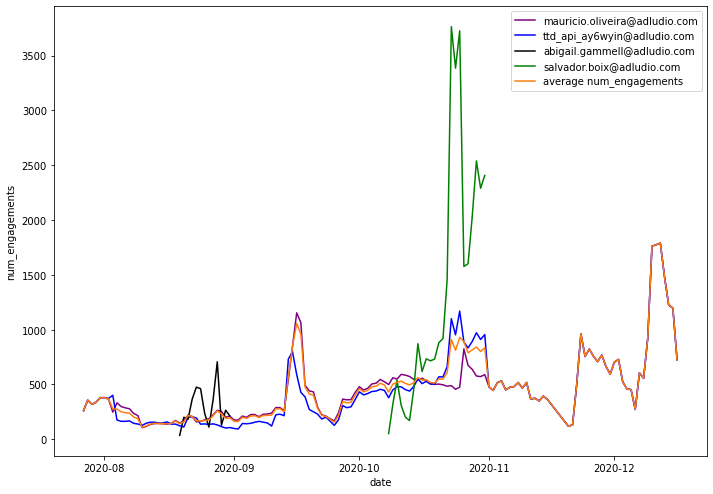

In [25]:
# Plot showing the daily average number of engagement for each campagain_manager and the api 
fig, ax = plt.subplots(figsize=a4Dims)
sns.lineplot(x="date", y="num_engagements", data=dfMerged, hue="user", ci=None, ax=ax, palette=["purple", "blue", "black", "green"])
sns.lineplot(x="date", y="num_engagements", data=dfMerged, ci=None, legend="brief", label="daily average num_engagements")

> When the campaign managers abigal and salvador were available the changes they made resulted in a significantly higher number of engagements over the daily average number of engagements as depicted by the green and black lines

> Mauricio's daily average number of engagements were at par with the overall daily averages and sometimes a bit higher up until mid October where a drop was observed as shown by the purple and orange lines

> The api daily average number of engagements were lower than the overall daily average up untill where they were higher than the overall daily as shown by the blue line  

> After the month of october campaign_manager data is not available

In [37]:
# Create a new column that shows who (the campaign manager or the algorithm api) caused the budget changes
dfMerged["api_or_manager"] = np.nan
dfMerged.loc[dfMerged["user"] == "ttd_api_ay6wyin@adludio.com", "api_or_manager"] = "api"
dfMerged.loc[dfMerged["user"] != "ttd_api_ay6wyin@adludio.com", "api_or_manager"] = "campaign manager"
dfMerged["api_or_manager"].unique()

array(['campaign manager', 'api'], dtype=object)

<AxesSubplot:xlabel='date', ylabel='num_engagements'>

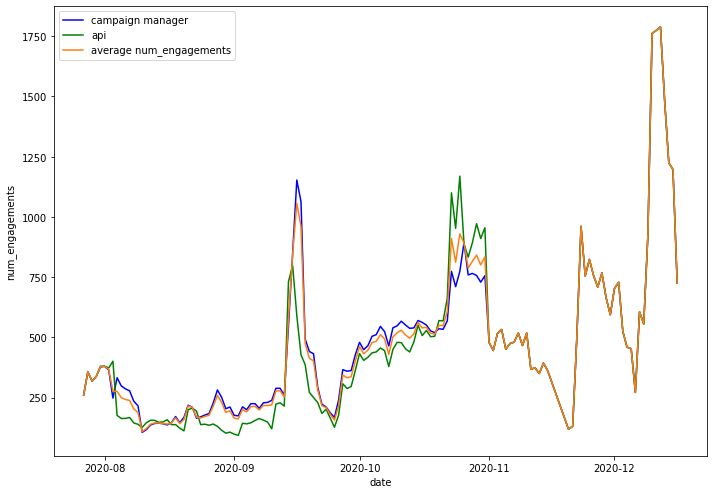

In [38]:
# Plot showing the daily average number of engagement for all combined campagain_managers and the api 
fig, ax = plt.subplots(figsize=a4Dims)
sns.lineplot(x="date", y="num_engagements", data=dfMerged, hue="api_or_manager", ci=None, ax=ax, palette=["blue", "green"])
sns.lineplot(x="date", y="num_engagements", data=dfMerged, ci=None, legend="brief", label="daily average num_engagements")

> changes made by a campaign managers slightly increased the number of engagements with respect to the daily average number of engagements as show by the blue line. However around mid-october the api has better performance than the daily average number of engagements.

> After the month of october campaign_manager data is not available